Tensorflow
======

In [4]:
import tensorflow as tf
import numpy 

# 즉시 실행 모드가 설정되어 있다면 True를 반환해줍니다.
print(tf.executing_eagerly())

# Tensorflow 상수 선언
a = tf.constant(5, name = 'input_node1')
b = tf.constant(3, name = 'input_node2')

# Tensorflow 연산 Node
c = tf.add(a,b, name = 'add_c')
d = tf.subtract(a,b, name = 'sub_d')
e = tf.multiply(c,d, name = 'add_e')

# Tensorflow 문자열 선언
hello = tf.constant('hello Tensorflow!')

# 선언한 변수들을 출력해보면 결과값이 아닌 데이터의 타입이나 형태가 출력됩니다.
for i in [a,b,c,d,e, hello]:
    print(i)
    
# 실제로 데이터의 값을 출력하기 위해서 numpy()를 사용합니다.
# for i in [a,b,c,d,e, hello]:
#     print(i.numpy())

False
Tensor("input_node1_2:0", shape=(), dtype=int32)
Tensor("input_node2_2:0", shape=(), dtype=int32)
Tensor("add_c_2:0", shape=(), dtype=int32)
Tensor("sub_d_2:0", shape=(), dtype=int32)
Tensor("add_e_2:0", shape=(), dtype=int32)
Tensor("Const_2:0", shape=(), dtype=string)


Tensorflow Process
----------

In [1]:
# Solving XOR Problem
import tensorflow as tf

T = 1.
F = 0.
train_in = [
    [T, T],
    [T, F],
    [F, T],
    [F, F],
]
train_out = [
    [F],
    [T],
    [T],
    [F],
]

# 1. 가중치, 편향 설정
w1 = tf.Variable(tf.random_normal([2,2]))
b1 = tf.Variable(tf.zeros([2]))

w2 = tf.Variable(tf.random_normal([2,1]))
b2 = tf.Variable(tf.zeros([1]))

# 2. 연산 적용
out1 = tf.nn.relu(tf.matmul(train_in, w1) + b1)
out2 = tf.nn.relu(tf.matmul(out1, w2) + b2)

# 3. 평가 척도
error = tf.subtract(train_out, out2)
mse = tf.reduce_mean(tf.square(error))

# 4. 학습 파라미터
err = 1.0 # 현재 에러
target = 0.01 # 목표 에러량
epoch = 0 # 반복 횟수
max_epochs = 1000 # 최대 반복 횟수

# 5. 학습
train = tf.train.GradientDescentOptimizer(0.01).minimize(mse)

# 6. 결과 확인
sess = tf.Session()
sess.run(tf.global_variables_initializer())

while err > target and epoch < max_epochs:
    epoch += 1
    err, _ = sess.run([mse, train]) # mse, train을 실행시켜줘야 학습이 가능함
    
print('epoch :', epoch, 'mse :', err)
print('result :', out1)

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


epoch : 1000 mse : 0.23707882
result : Tensor("Relu:0", shape=(4, 2), dtype=float32)


Eager Execution
----------

In [1]:
import tensorflow as tf

tf.enable_eager_execution()
print(tf.executing_eagerly())

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


True


Solving XOR Problem Using Keras
-----------

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

train_data = np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
target_data = np.array([[0],[1],[1],[0]], 'float32')

model = tf.keras.Sequential()
model.add(layers.Dense(16, input_dim=2, activation='relu')) # output = 16
model.add(layers.Dense(1, activation='sigmoid')) # output = 1

model.compile(loss = 'mse', optimizer='adam', metrics=['binary_accuracy'])
model.fit(train_data, target_data, nb_epoch=20)

Epoch 1/20
4/4 [==============================] - 0s 50ms/step - loss: 0.2454 - binary_accuracy: 0.7500
Epoch 2/20
4/4 [==============================] - 0s 1ms/step - loss: 0.2449 - binary_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 0s 0us/step - loss: 0.2444 - binary_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 0s 991us/step - loss: 0.2440 - binary_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 0s 0us/step - loss: 0.2435 - binary_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 0s 0us/step - loss: 0.2431 - binary_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 0s 1ms/step - loss: 0.2427 - binary_accuracy: 0.5000
Epoch 8/20
4/4 [==============================] - 0s 0us/step - loss: 0.2422 - binary_accuracy: 0.5000
Epoch 9/20
4/4 [==============================] - 0s 997us/step - loss: 0.2418 - binary_accuracy: 0.5000
Epoch 10/20
4/4 [==============================] - 0s 0us/step - los

Creating Data by Tensorflow
------------

In [21]:
import numpy as np
import tensorflow as tf

# craeting constant
a = tf.constant(10, name='a')

# tf.zeros, tf.one, tf.fill
b = tf.zeros([3,3], dtype=tf.float32, name='b')
c = tf.ones([2,3], dtype = tf.float32, name='c')
d = tf.fill([3,3], 5, name = 'd')

# tf.linspace, tf.range
lin = tf.linspace(3.0,10.0,4,name='lin')
ran = tf.range(0.0,limit=7.0, delta=1.0, name='range')

# random seed
# seed = tf.compat.v1.set_random_seed(2019)
seed = tf.set_random_seed(2019)

# normal distribution random tensor
norm_dist = tf.random_normal([3,3], mean=0.0, stddev=1.0, dtype=tf.float32, seed=2019, name='norm_dist')

# uniform distribution random tensor
uni_dist = tf.random_uniform([3,3], minval=0, maxval=1, dtype=tf.float32, seed=2019, name='uni_dist')

# tf.Variable
weight = tf.Variable(tf.random_normal([3,3]), name='weight')
bias = tf.Variable(tf.zeros([3]))

for i in [a, b, c, d, lin, ran, norm_dist, uni_dist, weight, bias]:
    print(i)
#     print(i.numpy)

1.10.0
Tensor("a_9:0", shape=(), dtype=int32)
Tensor("b_9:0", shape=(3, 3), dtype=float32)
Tensor("c_9:0", shape=(2, 3), dtype=float32)
Tensor("d_9:0", shape=(3, 3), dtype=int32)
Tensor("lin_13:0", shape=(4,), dtype=float32)
Tensor("range_6:0", shape=(7,), dtype=float32)
Tensor("norm_dist_1:0", shape=(3, 3), dtype=float32)
Tensor("uni_dist_1:0", shape=(3, 3), dtype=float32)
<tf.Variable 'weight_1:0' shape=(3, 3) dtype=float32_ref>
<tf.Variable 'Variable_4:0' shape=(3,) dtype=float32_ref>


Tensorflow Data Type and Calculation
-------------

In [27]:
import tensorflow as tf

# Assert Various data types
a =  tf.float32
b =  tf.int32
# c =  # Negative int
string1 = tf.string
string2 = tf.string
boolean = tf.bool # Boolean

# Unary operator
neg = tf.negative(1)   # Negative
logic = tf.logical_not(True) # Logical negative
absolute = tf.abs(neg)      # Absolute

# Calculation
add = tf.add(neg, absolute)      # add
sub = tf.subtract(neg, absolute)      # subtract
mul = tf.multiply(neg, absolute)      # multiply
div = tf.divide(neg, absolute)      # divide

mod = tf.mod(neg, absolute)      # Modulo
# mode = tf.math.mod(neg, absolute)  
po = tf.pow(absolute, neg)       # Pow
# tf.math.pow(neg, absolute)  
for i in [a,b,c,string1, string2, boolean, neg, logic, absolute, add, sub, mul, div, mod, po]:
#     print(i.numpy())
    print(i)

<dtype: 'float32'>
<dtype: 'int32'>
Tensor("c_9:0", shape=(2, 3), dtype=float32)
<dtype: 'string'>
<dtype: 'string'>
<dtype: 'bool'>
Tensor("Neg_2:0", shape=(), dtype=int32)
Tensor("LogicalNot_2:0", shape=(), dtype=bool)
Tensor("Abs_2:0", shape=(), dtype=int32)
Tensor("Add_4:0", shape=(), dtype=int32)
Tensor("Sub_3:0", shape=(), dtype=int32)
Tensor("Mul_2:0", shape=(), dtype=int32)
Tensor("truediv_2:0", shape=(), dtype=float64)
Tensor("FloorMod_1:0", shape=(), dtype=int32)
Tensor("Pow_1:0", shape=(), dtype=int32)


Linear Regression(ver.1)
----------

1.10.0
Step : 0| Weight : -2.38722| Bias : 5.03353| Cost : 49.24428
Step : 30| Weight : -0.38836| Bias : 5.01025| Cost : 4.56940
Step : 60| Weight : -0.25373| Bias : 4.52635| Cost : 3.72915
Step : 90| Weight : -0.13260| Bias : 4.08906| Cost : 3.04341
Step : 120| Weight : -0.02318| Bias : 3.69402| Cost : 2.48377
Step : 150| Weight : 0.07567| Bias : 3.33714| Cost : 2.02704
Step : 180| Weight : 0.16497| Bias : 3.01474| Cost : 1.65429
[3.9118857]
[3.3693726]


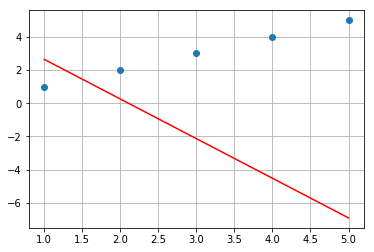

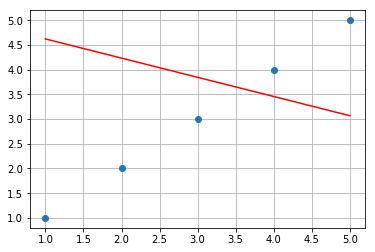

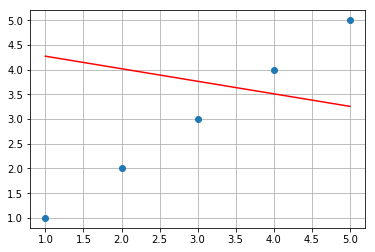

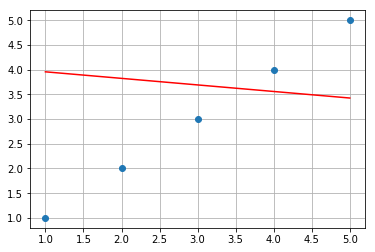

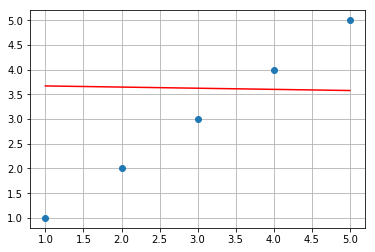

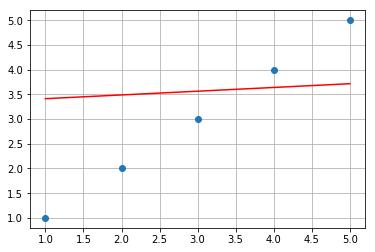

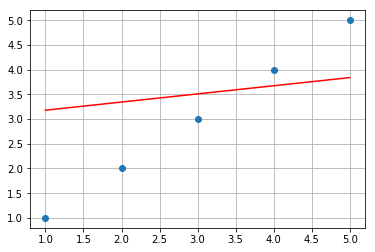

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Tensorflow 1.8 Version
print(tf.__version__)

# 시각화 함수
def Visualize(x_data, y_data, hypothesis):
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(x_data, hypothesis, 'r-')
    ax.plot(x_data, y_data, 'o')
    fig.savefig("pictures/lr_tf1_plot.png")

# 선형 데이터 x, y 선언
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# 학습에 사용할 Weight, Bias 선언
W = tf.Variable(tf.random_uniform([1], -5.0, 5.0))
b = tf.Variable(tf.random_uniform([1], -5.0, 5.0))

# 입력이 들어갈 Placeholder (Input Node) 선언
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Cost 함수 설계
hypothesis = W * X + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 학습 속도, Cost (Loss)를 줄여나가는 방법을 정하고 Optimizer를 선언합니다.
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)

# Session을 열어줍니다.
sess = tf.Session()

# Session 내의 전체 변수를 초기화
sess.run(tf.initializers.global_variables())

# 200번 학습 진행
for i in range(200):
    # Train 객체에 학습 데이터 x_data와 Label 값 y_data를 입력합니다.
    # 입력은 feed_dict로 딕셔너리 형태의 입력이 들어갑니다.
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if i % 30 == 0:
        Visualize(x_data, y_data, sess.run(hypothesis, feed_dict = {X : x_data}))
        print("Step : {}| Weight : {:.5f}| Bias : {:.5f}| Cost : {:.5f}".format(i,float(sess.run(W)), float(sess.run(b)), float(sess.run(cost, feed_dict={X: x_data, Y: y_data}))))

# Iteration이 끝나면 학습이 끝났습니다.        
# 이제 검증 데이터로 학습된 hypothesis 성능을 평가합니다.
print(sess.run(hypothesis, feed_dict = {X : 5}))
print(sess.run(hypothesis, feed_dict = {X : 2.5}))

# 연산이 전부 끝났으면 Session을 닫아줍니다.
sess.close()

Linear Regression(ver.2)
---------

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def Visualize(x_data, y_data, hypothesis):
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(x_data, hypothesis.numpy(), 'r-')
    ax.plot(x_data, y_data, 'o')
    fig.savefig("plot.png")

# Hyperparameter 설정
# 학습에 필요한 파라미터를 선언합니다.
train_step = 500
learning_rate = 0.05

# 학습에 사용할 데이터를 준비합니다.
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# 학습에 사용될 Weight와 Bias를 선언합니다.
# 일반적으로 랜덤 값으로 선언해 사용하며 학습 데이터와 Shape을 일치시킵니다.
W = tf.Variable((-5.0), dtype=tf.float32)
b = tf.Variable((2.0), dtype=tf.float32)


# 학습을 진행합니다.
for i in range(train_step):
    with tf.GradientTape() as tape:
        # y = W*X + b 형태의 hypothesis를 선언합니다.
        hypothesis = tf.add(W * x_data, b)
        # 에러를 최소화시키는 손실 함수 cost function을 설계합니다.
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    # Gradient Descent 방법으로 Error를 최소화하고 Weight와 Bias를 업데이트 합니다.
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    # 30번 마다 출력
    if i % 30 == 0:
        Visualize(x_data,y_data,hypothesis)        
        print("Iter : {}| Weight : {:.4f}| Bias : {:.4f}|Cost : {:.4f}".format(i, W.numpy(), b.numpy(), cost))

# 학습된 Weight와 Bias로 검증
print((W * 5.5 + b).numpy())
print((W * 3 + b).numpy())

Tensorflow + Keras
----------

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
100/100 [==============================] - 0s 3ms/step - loss: 26.2797 - mean_squared_error: 26.2797 - binary_crossentropy: 13.1680
Epoch 2/500
100/100 [==============================] - 0s 0us/step - loss: 26.1210 - mean_squared_error: 26.1210 - binary_crossentropy: 11.9639
Epoch 3/500
100/100 [==============================] - 0s 0us/step - loss: 25.9628 - mean_squared_error: 25.9628 - b

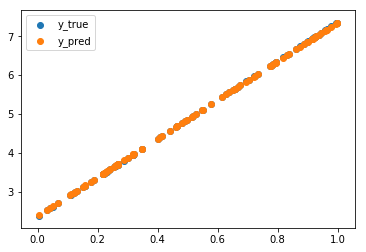

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

x = np.random.rand(100,1)
y = 5 * x + 3 * np.random.rand(1)

model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    # 첫 번째 Layer에 데이터를 넣을때는 input_shape을 맞춰줘야합니다.
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape = (1, )),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mse', 'binary_crossentropy'])
# 모델이 어떻게 이루어져있는지 출력합니다.
model.summary()
# 모델을 학습시킵니다
history = model.fit(x,y, epochs = 500, batch_size = 100)

# 결과 출력
plt.scatter(x, y, label='y_true')
plt.scatter(x, model.predict(x), label='y_pred')
plt.legend()
plt.savefig("tf_keras_plot.png")